In [9]:
import requests

response = requests.post( "https://image-filter-fastapi.herokuapp.com/" )
response.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [10]:
import json
json.loads(response.content.decode( "utf-8" ))

{'filters_available': ['blur',
  'contour',
  'detail',
  'edge_enhance',
  'edge_enhance_more',
  'emboss',
  'find_edges',
  'sharpen',
  'smooth',
  'smooth_more'],
 'usage': {'http_method': 'POST', 'URL': '/<filter_available>/'}}

In [11]:
response.content

b'{"filters_available":["blur","contour","detail","edge_enhance","edge_enhance_more","emboss","find_edges","sharpen","smooth","smooth_more"],"usage":{"http_method":"POST","URL":"/<filter_available>/"}}'

In [15]:
file = { "img" : open( "sample.jpg" , "rb" )}
headers = { "type" : "multipart/image" }
URL = "https://image-filter-fastapi.herokuapp.com"
filter = "contour"
response = requests.post(f"{URL}/{filter}", files=file)
response.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [16]:
print(response.status_code)
print(response.reason)

200
OK


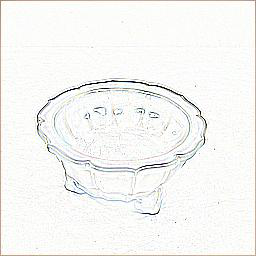

In [18]:
from PIL import Image
import io

image = Image.open(io.BytesIO(response.content))
image.save( "response.jpg" , "JPEG" )
image